In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

In [2]:
data=pd.read_excel('Competição.xlsx')
data

,Integrante,Ação 1,Ação 2,Ação 3,Ação 4
0,Chaves,VIVA3.SA,LINX3.SA,ENAT3.SA,BBAS3.SA
1,Bona,PSSA3.SA,KLBN3.SA,ARZZ3.SA,BBDC3.SA
2,Gleicy,VVAR3.SA,AZUL4.SA,LAME4.SA,HGTX3.SA
3,Michel,COGN3.SA,BBAS3.SA,IGTA3.SA,PETR4.SA
4,Pedro,BBAS3.SA,PETR4.SA,GGBR4.SA,VVAR3.SA
5,Gabriel,HGTX3.SA,HGTX3.SA,HGTX3.SA,HGTX3.SA


In [3]:
rentabilidade=[]
rent=[0]*4

In [4]:
for j in range(len(data)):
    for i in range(4):
        a=wb.DataReader(data.iloc[j][1+i], data_source='yahoo', start='2020-7-13')['Adj Close']
        rent[i]=round(((a[-1]/a[0])-1)*100,2)
    rentabilidade.append(np.mean(rent))

In [5]:
data['Rentabilidade']=rentabilidade

In [6]:
data

,Integrante,Ação 1,Ação 2,Ação 3,Ação 4,Rentabilidade
0,Chaves,VIVA3.SA,LINX3.SA,ENAT3.SA,BBAS3.SA,1.8075
1,Bona,PSSA3.SA,KLBN3.SA,ARZZ3.SA,BBDC3.SA,1.8550
2,Gleicy,VVAR3.SA,AZUL4.SA,LAME4.SA,HGTX3.SA,3.2525
3,Michel,COGN3.SA,BBAS3.SA,IGTA3.SA,PETR4.SA,2.4150
4,Pedro,BBAS3.SA,PETR4.SA,GGBR4.SA,VVAR3.SA,3.5650
5,Gabriel,HGTX3.SA,HGTX3.SA,HGTX3.SA,HGTX3.SA,-2.3100


# Comparação gráfica:

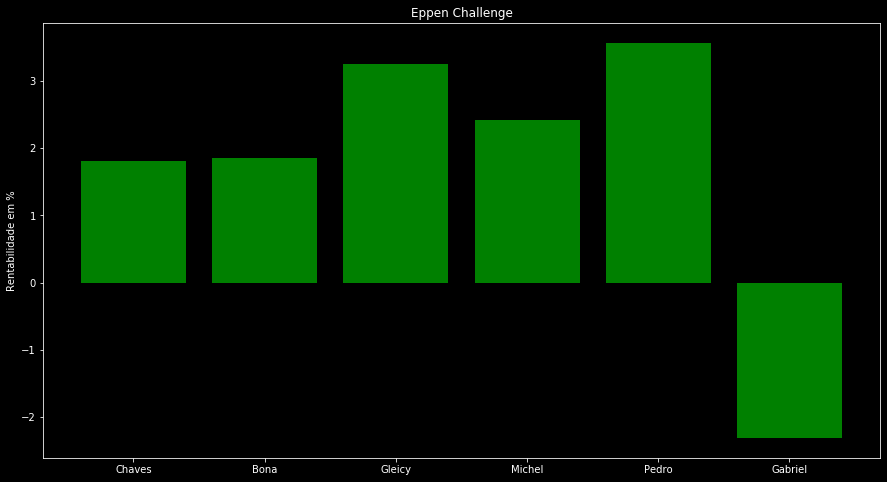

In [8]:
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
plt.bar(data['Integrante'],data['Rentabilidade'],color='green')
plt.ylabel('Rentabilidade em %');
plt.title('Eppen Challenge');